In [5]:
# Edwin Peter
# 177019

# Data taken from :
# https://www.kaggle.com/dalpozz/creditcardfraud/data
# Data contains 30 attributes, 28 of which are anonymized, 2 of which are the first and last attributes, Time and Amount.
# The aim of this dataset is to predict if a record is fraudulent or genuine, where class value 1 is fraud and 0 is not.
# Data contains 284,807 records

# Basic Imports

In [6]:
import pandas as pd
import numpy as np
from random import random
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Summary Statistics

In [7]:
df = pd.read_csv("creditcard.csv")

print "Summary Statistics:"
print df.describe()

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1

In [8]:
pd.set_option('display.max_columns', None)
summary_stats = df.describe()
summary_stats.to_csv('summary_stats.csv')

In [9]:
X = np.asarray(df)[:,0:-1]
y = np.asarray(df)[:,-1]

print X
print y

[[  0.00000000e+00  -1.35980713e+00  -7.27811733e-02 ...,   1.33558377e-01
   -2.10530535e-02   1.49620000e+02]
 [  0.00000000e+00   1.19185711e+00   2.66150712e-01 ...,  -8.98309914e-03
    1.47241692e-02   2.69000000e+00]
 [  1.00000000e+00  -1.35835406e+00  -1.34016307e+00 ...,  -5.53527940e-02
   -5.97518406e-02   3.78660000e+02]
 ..., 
 [  1.72788000e+05   1.91956501e+00  -3.01253846e-01 ...,   4.45477214e-03
   -2.65608286e-02   6.78800000e+01]
 [  1.72788000e+05  -2.40440050e-01   5.30482513e-01 ...,   1.08820735e-01
    1.04532821e-01   1.00000000e+01]
 [  1.72792000e+05  -5.33412522e-01  -1.89733337e-01 ...,  -2.41530880e-03
    1.36489143e-02   2.17000000e+02]]
[ 0.  0.  0. ...,  0.  0.  0.]


Variation in Target Class:
Instances of class 0: 284315
Instances of class 1: 492

Percentage of class 0: 99.83%
Percentage of class 1: 0.17%


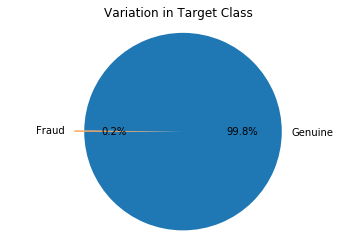

In [10]:
# Variation in 'Target' class
print "Variation in Target Class:"
values, counts = np.unique(y, return_counts=True)
class0 = counts[0]
class1 = counts[1]
total_instances = class0 + class1

print "Instances of class {:.0f}: {}".format(values[0],class0)
print "Instances of class {:.0f}: {}".format(values[1],class1)
print ""
# Percentage of class representation
percentage_class0 = 1.0*class0/total_instances*100
percentage_class1 = 1.0*class1/total_instances*100

print "Percentage of class 0: {:.2f}%".format(percentage_class0)
print "Percentage of class 1: {:.2f}%".format(percentage_class1)

labels = 'Genuine', 'Fraud'
sizes = [percentage_class0, percentage_class1]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Variation in Target Class')
plt.show()
fig1.savefig('Class_Representation.png')

In [11]:
# Scaling
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.array(X_scaled)
print X_scaled

[[-1.99658302 -0.69424232 -0.04407492 ...,  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ..., -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ..., -0.13713686 -0.18102083
   1.16068593]
 ..., 
 [ 1.6419735   0.98002374 -0.18243372 ...,  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...,  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ..., -0.00598394  0.04134999
   0.51435531]]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 0)

print np.unique(y_train, return_counts=True)
print np.unique(y_test, return_counts=True)


(array([ 0.,  1.]), array([255889,    437]))
(array([ 0.,  1.]), array([28426,    55]))


In [74]:
# Undersampling using SMOTE
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, ratio = 0.1)
X_sm, y_sm = rus.fit_sample(X_train, y_train)

/Users/Edwin/Desktop/env1/tensor/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [76]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
rus = SMOTE(random_state=0)
X_sm, y_sm = rus.fit_sample(X_sm, y_sm)

Instances of class 0: 4370
Instances of class 1: 4370

Percentage of class 0: 50.00%
Percentage of class 1: 50.00%


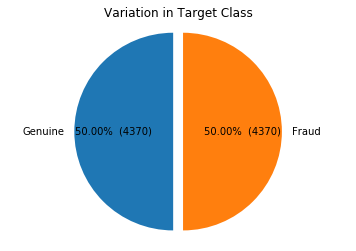

In [100]:
# After using SMOTE
values, counts = np.unique(y_sm, return_counts=True)

print "Instances of class {:.0f}: {}".format(values[0],counts[0])
print "Instances of class {:.0f}: {}".format(values[1],counts[1])
print ""
# Percentage of class representation
percentage_class0 = 1.0*counts[0]/(counts[0] + counts[1])*100
percentage_class1 = 1.0*counts[1]/(counts[0] + counts[1])*100

print "Percentage of class 0: {:.2f}%".format(percentage_class0)
print "Percentage of class 1: {:.2f}%".format(percentage_class1)

labels = 'Genuine', 'Fraud'
sizes = [percentage_class0, percentage_class1]
explode = (0, 0.1)


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(counts),
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Variation in Target Class')
plt.show()
fig1.savefig('After_Smote_Class_Representation.png')

# KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1,10,30,50,100,150,200]
knn_recall_score = []
for i in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = i,
                                  metric = 'euclidean')
    knn_classifier.fit(X_sm, y_sm)
    knn_y_pred = knn_classifier.predict(X_test)

    knn_matrix = metrics.confusion_matrix(y_test, knn_y_pred)
    print "K-Nearest Neighbors where n_neighbors = {}".format(i)
    print knn_matrix

    false_positive = knn_matrix[1][0]
    true_negative = knn_matrix[1][1]
    recall = 1 - (1.0*false_positive/(false_positive + true_negative))
    print "Recall: {:.2f}%".format(recall*100)
    knn_recall_score.append(recall)
    


K-Nearest Neighbors where n_neighbors = 1
[[27844   582]
 [    4    51]]
Recall: 92.73%
K-Nearest Neighbors where n_neighbors = 10
[[27434   992]
 [    4    51]]
Recall: 92.73%
K-Nearest Neighbors where n_neighbors = 30
[[27507   919]
 [    1    54]]
Recall: 98.18%
K-Nearest Neighbors where n_neighbors = 50
[[27656   770]
 [    2    53]]
Recall: 96.36%
K-Nearest Neighbors where n_neighbors = 100
[[27932   494]
 [    4    51]]
Recall: 92.73%
K-Nearest Neighbors where n_neighbors = 150
[[28072   354]
 [    5    50]]
Recall: 90.91%
K-Nearest Neighbors where n_neighbors = 200
[[28110   316]
 [    6    49]]
Recall: 89.09%


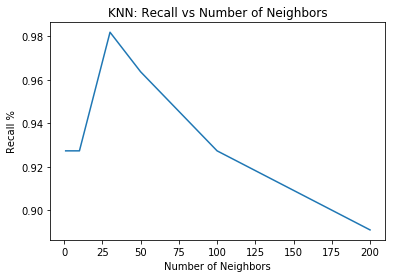

In [168]:
plt.title('KNN: Recall vs Number of Neighbors')
plt.ylabel('Recall %')
plt.xlabel('Number of Neighbors')
plt.plot(neighbors, knn_recall_score)
plt.savefig('KNN-performance.png')

# SVM

In [188]:
from sklearn.svm import SVC

C = [0.01, 0.1,0.2,0.4,0.5, 1, 10, 20]
recall_svm = []
overall_accuracy = []
for i in C:
    classifier = SVC(kernel = 'linear', random_state = 0, C = i)
    classifier.fit(X_sm, y_sm)

    svm_y_pred = classifier.predict(X_test)
    svm_matrix = metrics.confusion_matrix(y_test, svm_y_pred)
    print "SVM where C = {}".format(i)
    print svm_matrix
    accuracy = accuracy_score(y_test, svm_y_pred)
    print "Accuracy: {:.2f}%".format(accuracy*100)
    overall_accuracy.append(accuracy)
    
    false_positive = svm_matrix[1][0]
    true_negative = svm_matrix[1][1]
    recall = 1 - (1.0*false_positive/(false_positive + true_negative))
    print "Recall: {:.2f}%".format(recall*100)
    recall_svm.append(recall)

SVM where C = 0.01
[[27893   533]
 [    2    53]]
Accuracy: 98.12%
Recall: 96.36%
SVM where C = 0.1
[[27793   633]
 [    2    53]]
Accuracy: 97.77%
Recall: 96.36%
SVM where C = 0.2
[[27761   665]
 [    2    53]]
Accuracy: 97.66%
Recall: 96.36%
SVM where C = 0.4
[[27753   673]
 [    1    54]]
Accuracy: 97.63%
Recall: 98.18%
SVM where C = 0.5
[[27752   674]
 [    1    54]]
Accuracy: 97.63%
Recall: 98.18%
SVM where C = 1
[[27740   686]
 [    1    54]]
Accuracy: 97.59%
Recall: 98.18%
SVM where C = 10
[[27733   693]
 [    1    54]]
Accuracy: 97.56%
Recall: 98.18%
SVM where C = 20
[[27731   695]
 [    1    54]]
Accuracy: 97.56%
Recall: 98.18%


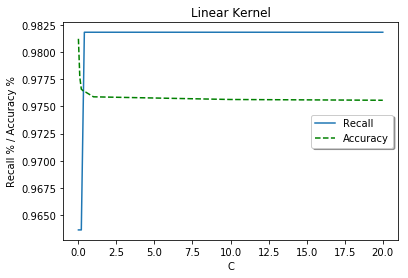

In [190]:
fig, ax = plt.subplots()
ax.plot(C, recall_svm, label='Recall')
ax.plot(C,overall_accuracy,'g--', label='Accuracy')
ax.set_title('Linear Kernel')
ax.set_ylabel('Recall % / Accuracy %')
ax.set_xlabel('C')


# Now add the legend with some customizations.
legend = ax.legend(loc='center right', shadow=True)


fig.savefig('SVM-performance.png')

# Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

num_trees = [1,2,3,4,5,6,7,8,9,10,100]
rf_recall = []
rf_overall_accuracy = []
for i in num_trees:
    rf_classifier = RandomForestClassifier(n_estimators = i)
    rf_classifier.fit(X_sm, y_sm)
    #rf_score = cross_val_score(rf_classifier, X_test, y_test, cv=5)
    #print "Cross Validation Score for n_estimators = {}: {:.2f}%".format(i,rf_score.mean()*100)
    print "Number of Trees: {}".format(i)
    random_forest_prediction = rf_classifier.predict(X_test)
    random_forest_matrix = metrics.confusion_matrix(y_test, random_forest_prediction)
    print random_forest_matrix

    accuracy = accuracy_score(y_test, random_forest_prediction)
    print "Accuracy: {:.2f}%".format(accuracy*100)
    rf_overall_accuracy.append(accuracy*100)
    
    false_positive = random_forest_matrix[1][0]
    true_negative = random_forest_matrix[1][1]
    recall = 1 - (1.0*false_positive/(false_positive + true_negative))
    print "Recall: {:.2f}%\n".format(recall*100)
    rf_recall.append(recall*100)
    


Number of Trees: 1
[[27048  1378]
 [    5    50]]
Accuracy: 95.14%
Recall: 90.91%

Number of Trees: 2
[[28235   191]
 [    8    47]]
Accuracy: 99.30%
Recall: 85.45%

Number of Trees: 3
[[27907   519]
 [    6    49]]
Accuracy: 98.16%
Recall: 89.09%

Number of Trees: 4
[[28271   155]
 [    6    49]]
Accuracy: 99.43%
Recall: 89.09%

Number of Trees: 5
[[28141   285]
 [    5    50]]
Accuracy: 98.98%
Recall: 90.91%

Number of Trees: 6
[[28288   138]
 [    6    49]]
Accuracy: 99.49%
Recall: 89.09%

Number of Trees: 7
[[28197   229]
 [    5    50]]
Accuracy: 99.18%
Recall: 90.91%

Number of Trees: 8
[[28298   128]
 [    8    47]]
Accuracy: 99.52%
Recall: 85.45%

Number of Trees: 9
[[28243   183]
 [    7    48]]
Accuracy: 99.33%
Recall: 87.27%

Number of Trees: 10
[[28304   122]
 [    7    48]]
Accuracy: 99.55%
Recall: 87.27%

Number of Trees: 100
[[28350    76]
 [    7    48]]
Accuracy: 99.71%
Recall: 87.27%



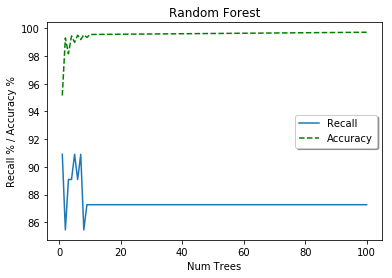

In [215]:
fig, ax = plt.subplots()
ax.plot(num_trees, rf_recall, label='Recall')
ax.plot(num_trees,rf_overall_accuracy,'g--', label='Accuracy')
ax.set_title('Random Forest')
ax.set_ylabel('Recall % / Accuracy %')
ax.set_xlabel('Num Trees')


# Now add the legend with some customizations.
legend = ax.legend(loc='center right', shadow=True)


fig.savefig('rf-performance.png')